# Practical 9

## Retrieval of Topics:NER
---
Aim: To use NER framework for identification fo Person,Location and Organisation

Theory:The next task was to Retrive Topics name from summary:
-  1.identifying the Nouns from summary , this is really important because we want to retrieve the names of entities
-  2.Removal of Stop words

Another suggested approach to Retrive the topics/categories is to look the url of the articles<br>
some URLs have categories in them which helps to to some extent but these are small in numbers
<br><br>
In the meanwhile we can create a crawler to look at those websites and get the Topics from their MetaTags<br>
this is included in another report ,it was not a successful approach due to time contraints and inconsistent<br>
practices followed in Web Development

The next solution is to use Named Entity Recognition Frameworks which identify the entities under<br>
- Persons
- Organizations
- Location

There are two Popular NER frameworks available on the internet which are tested in this document<br>
-  NTLK 
-  NER Stanford<br>

The Decision to choose which Framework to use was mainly dependent on two factors
- Accuracy
- Speed

NLTK's NER gives the output in the form of Trees and Standford's NER provides the output in the form of list
The main bottleneck which Standford's NER has is the speed of its output<br>
i have tried Stanford's NER several times thinking it might be the issue with my pc ,but it is really slow<br>
as compared NLTK's and hence the reason it is better to use NLTK's version<br>
The only advantage Stanford's NER has is the accuracy but its not significant when you have alot of data 

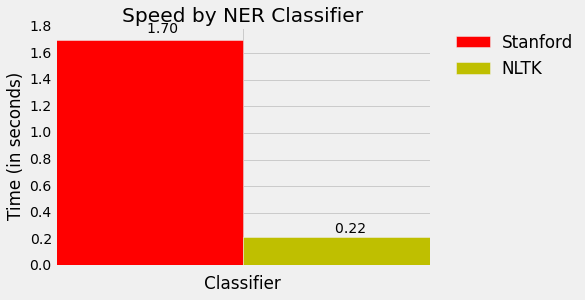

## NER

In [73]:
##NLTK Version
def get_continuous_chunks(text):
    chunked = ne_chunk(pos_tag(word_tokenize(text)))
    prev = None
    continuous_chunk = []
    current_chunk = []
    for i in chunked:
        if type(i) == Tree:
            tag = i._label
            current_str = " ".join([token for token, pos in i.leaves()])
            current_chunk.append(" ".join([token for token, pos in i.leaves()]))
            
            current_chunk = [tag, current_str]
        elif current_chunk:
            named_entity = current_chunk
            
            if named_entity not in continuous_chunk:
                continuous_chunk.append(named_entity)
                current_chunk = []
        else:
            continue
            
    return continuous_chunk

In [74]:
def getNER(text):
    classified_text=get_continuous_chunks(text)
    Person=""
    Org=""
    loc=""
    for a in classified_text:
        if a[0]=='PERSON':
            Person+=a[1]+","
        elif a[0]=='ORGANIZATION':
            Org+=a[1]+","
        elif a[0]=='LOCATION':
            loc+=a[1]+","
    NERresult={}
    NERresult['PERSON']=Person[:-1]
    NERresult['ORGANIZATION']=Org[:-1]
    NERresult['LOCATION']=loc[:-1]
 #   return Person,Org,loc
    return NERresult

In [75]:
## NER STANFORD
def getInChunks(text):
    continuous_chunk=[]
    current_chunk=[]
    for key,value in text:
        if value!='O':
            current_chunk.append((key,value))
        else:
            if current_chunk:
                continuous_chunk.append(current_chunk)
                current_chunk=[]
    if current_chunk:
        continuous_chunk.append(current_chunk)
    new_chunk=[]
    for ne in continuous_chunk:
        entity=""
        for key,value in ne:
            entity+="".join(key)+" "
        entity=entity[:-1]+','
        entity+="".join(value)
        new_chunk.append((entity))
    return new_chunk

In [76]:
df['POL']=df['summary'].apply(lambda x:getNER(x)) ## this takes even more time

In [77]:
df['POL'].head()

0    {'PERSON': '', 'ORGANIZATION': 'Army', 'LOCATI...
1    {'PERSON': '', 'ORGANIZATION': '', 'LOCATION':...
2    {'PERSON': '', 'ORGANIZATION': 'Sanjay Gandhi ...
3    {'PERSON': '', 'ORGANIZATION': '', 'LOCATION':...
4    {'PERSON': 'Barack Obama,Xi Jinping,Lo Sze Pin...
Name: POL, dtype: object

In [78]:
df['PERSON']=df['POL'].map(lambda x:x['PERSON'])

In [79]:
df['ORGANIZATION']=df['POL'].map(lambda x:x['ORGANIZATION'])

In [80]:
df['LOCATION']=df['POL'].map(lambda x:x['LOCATION'])

In [81]:
del df['POL']

In [82]:
df.head()

,url,source,crawl_time,title,trimmed_description,summary,city,state,Date,PERSON,ORGANIZATION,LOCATION
0,http://www.thehindu.com/news/national/New-Army...,The Hindu,2017-01-01 00:00:00,New Army Air Force Chiefs assume charge,The Army and the Air Force got new chiefs on ...,The Army and the Air Force got new chiefs on ...,,,2017-01-01 00:00:00,,Army,
1,http://www.thehindu.com/news/national/kerala/K...,The Hindu,2017-01-01 00:00:00,KSRTC unions call for stir on,The Indian National Trade Union Congress INTUC...,Utility needs crore to pay salary two ths pen...,,,2017-01-01 00:00:00,,,
2,http://www.thehindu.com/news/cities/mumbai/Luc...,The Hindu,2017-01-01 00:00:00,Lucky escape for tourists in SGNP bus mishap,More than people on board a bus operated by ...,More than people on board a bus operated by ...,Mumbai,,2017-01-01 00:00:00,,"Sanjay Gandhi National Park,Kanheri Caves",
3,http://www.thehindu.com/news/cities/Hyderabad/...,The Hindu,2017-01-01 00:00:00,A successful year for Tollywood,The year just gone by will undoubtedly go down...,The year saw a diverse range of movies being r...,,,2017-01-01 00:00:00,,,
4,http://www.sify.com/news/china-to-ban-ivory-tr...,Sify,2017-01-01 00:00:00,China to ban ivory trade by end of,php iffunctionexistsismobile ismobile php ...,Beijing China will ban the processing and sale...,,,2017-04-15 00:00:00,"Barack Obama,Xi Jinping,Lo Sze Ping,Wild Fauna...","State Council,State Forestry Administration,Ef...",
